###  1. All Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import plotly.express as exp
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

### 2. Reading the data

In [2]:
url = "archive/diabetes.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 3. Basic analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print(f"The number of rows: {data.shape[0]}")
print(f"The number of colummns: {data.shape[1]}")

The number of rows: 768
The number of colummns: 9


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# check for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 4. Exploratory data analysis

#### 4.1 Univariate Analysis

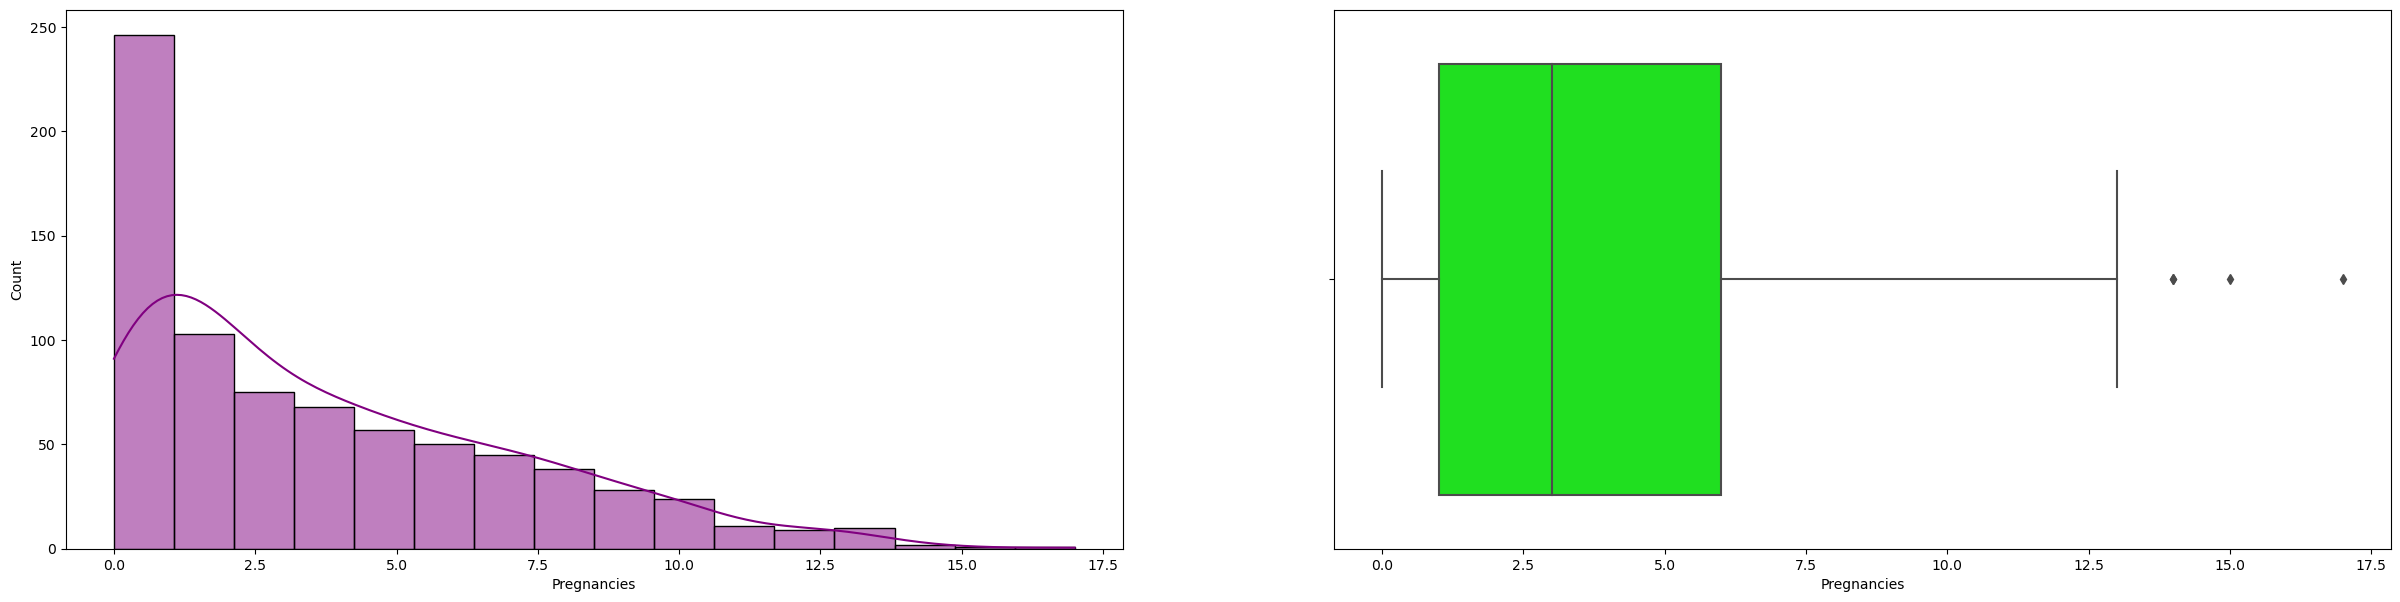

Median of Pregnancies:  3.0
Maximum of Pregnancies:  17


In [8]:
# Univariate analysis of variable 'Pregnancies' 
fig1, ax1 = plt.subplots(1, 2, figsize=(30, 7))
sns.histplot(data=data, x="Pregnancies", kde=True, ax=ax1[0],color = 'purple')
sns.boxplot(data=data, x="Pregnancies", ax=ax1[1],color = 'lime')
plt.show()

print("Median of Pregnancies: ", data["Pregnancies"].median())
print("Maximum of Pregnancies: ", data["Pregnancies"].max())

###### There are 3 Outliers for pregnancies, they can be removed. I chose to not remove them because outliers can sometimes be useful.

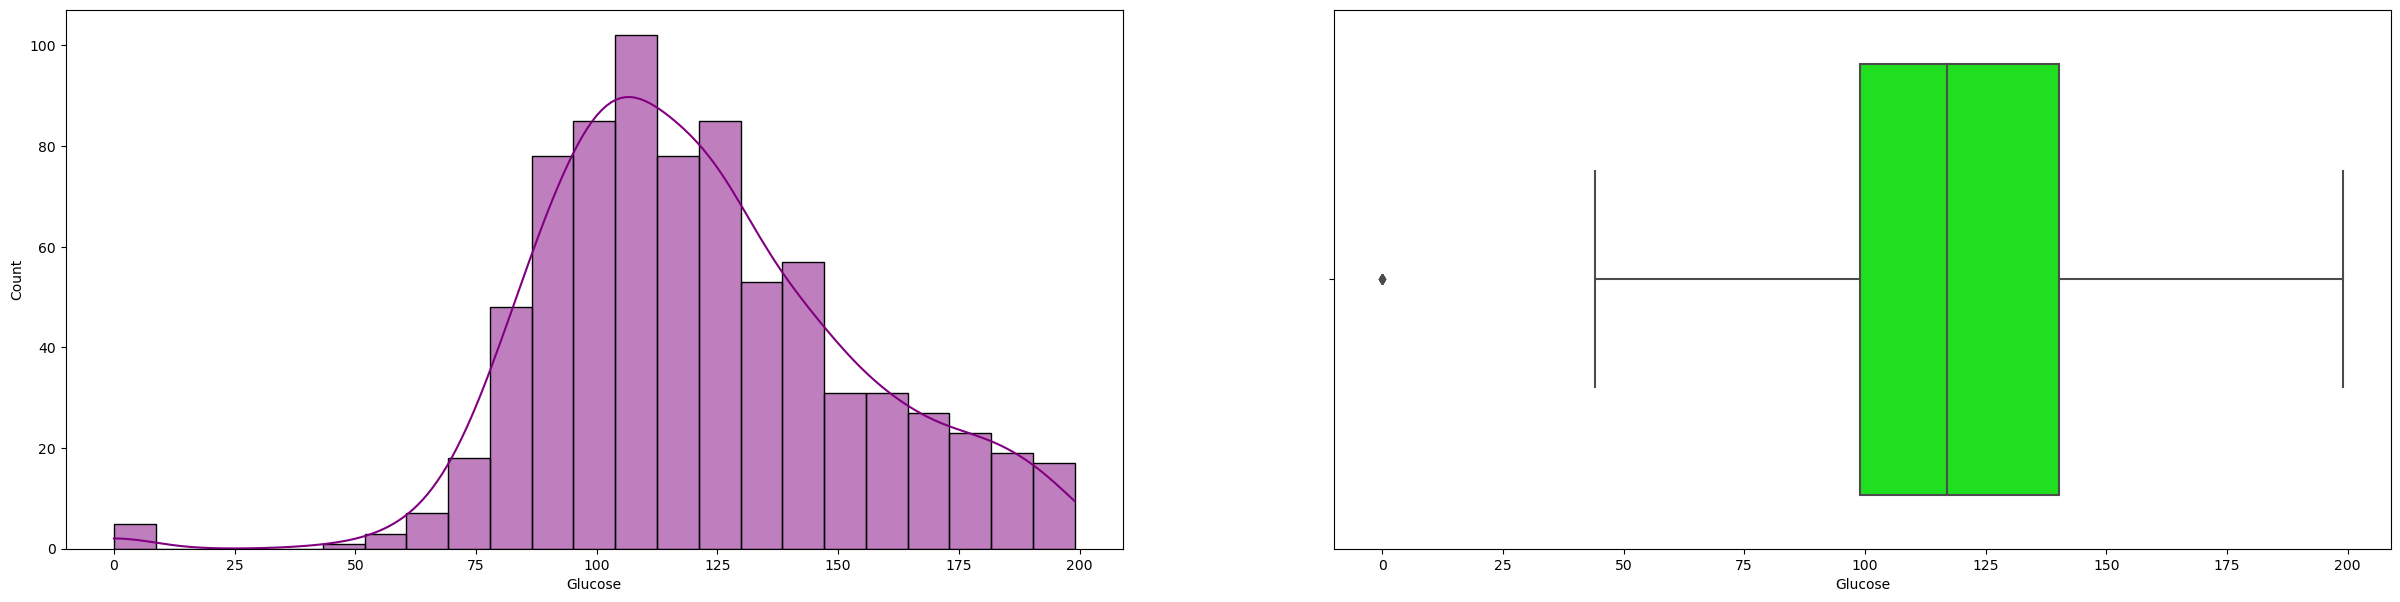

Median of Glucose:  117.0
Maximum of Glucose:  199


In [9]:
# Univariate analysis of variable 'Glucose'
fig1, ax1 = plt.subplots(1, 2, figsize=(30, 7))
sns.histplot(data=data, x="Glucose", kde=True, ax=ax1[0],color = 'purple')
sns.boxplot(data=data, x="Glucose", ax=ax1[1],color = 'lime')
plt.show()

print("Median of Glucose: ", data["Glucose"].median())
print("Maximum of Glucose: ", data["Glucose"].max())

###### The distribution is more or less symmetric

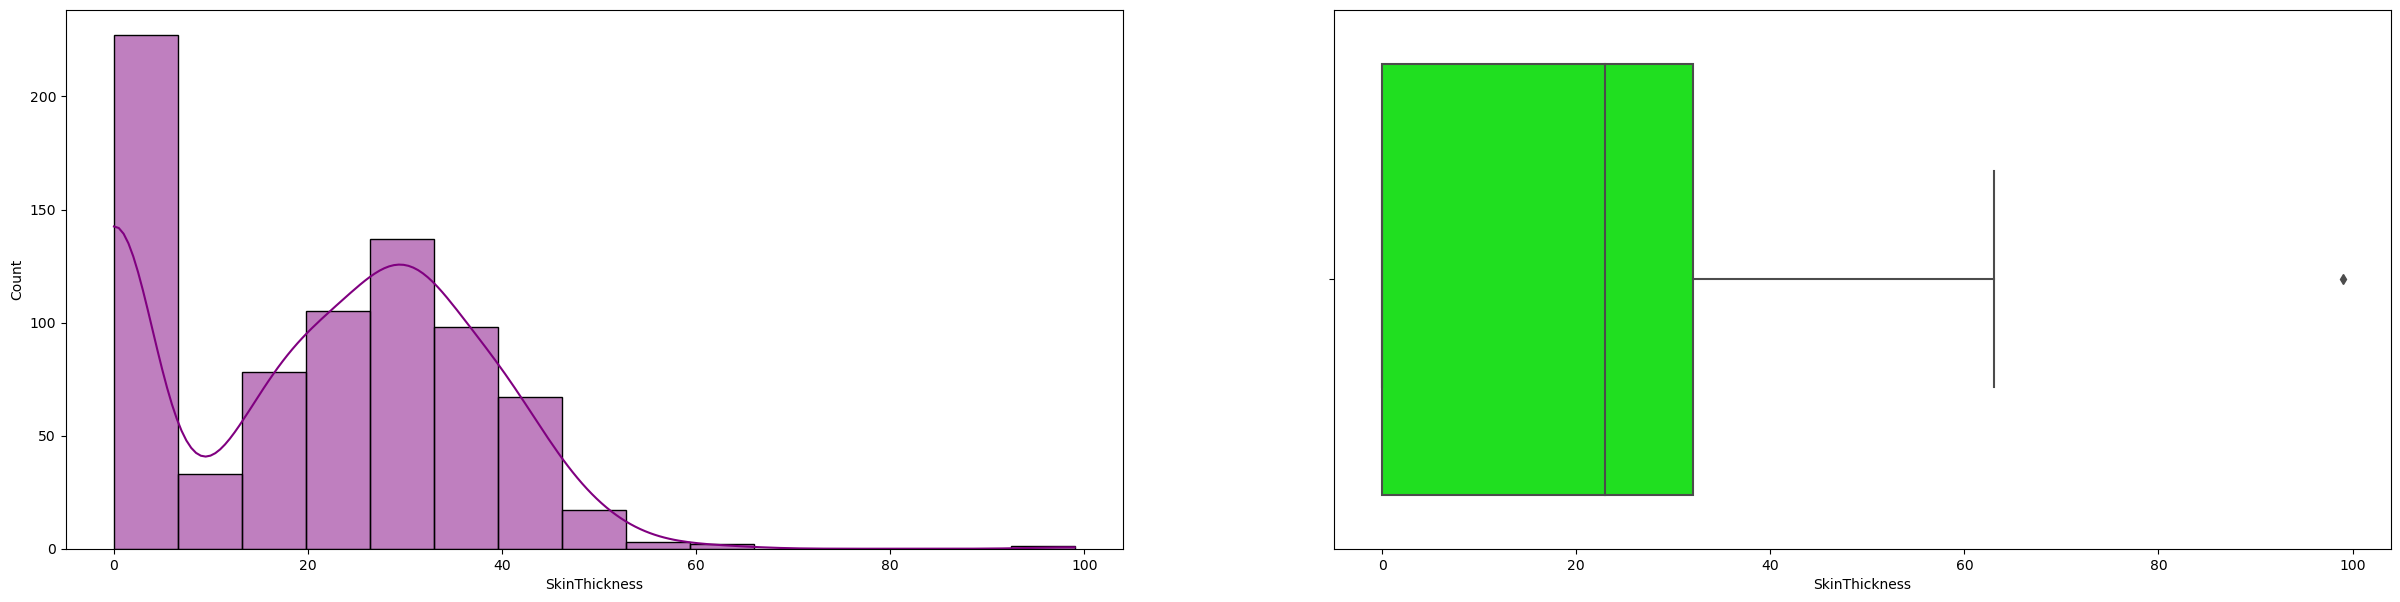

In [10]:
# Univariate analysis of 'SkinThickness'
fig1, ax1 = plt.subplots(1, 2, figsize=(30, 7))
sns.histplot(data=data, x="SkinThickness", kde=True, ax=ax1[0],color = 'purple')
sns.boxplot(data=data, x="SkinThickness", ax=ax1[1],color = 'lime')
plt.show()

###### The plot of SkinThickness is not symmetric and has some outliers

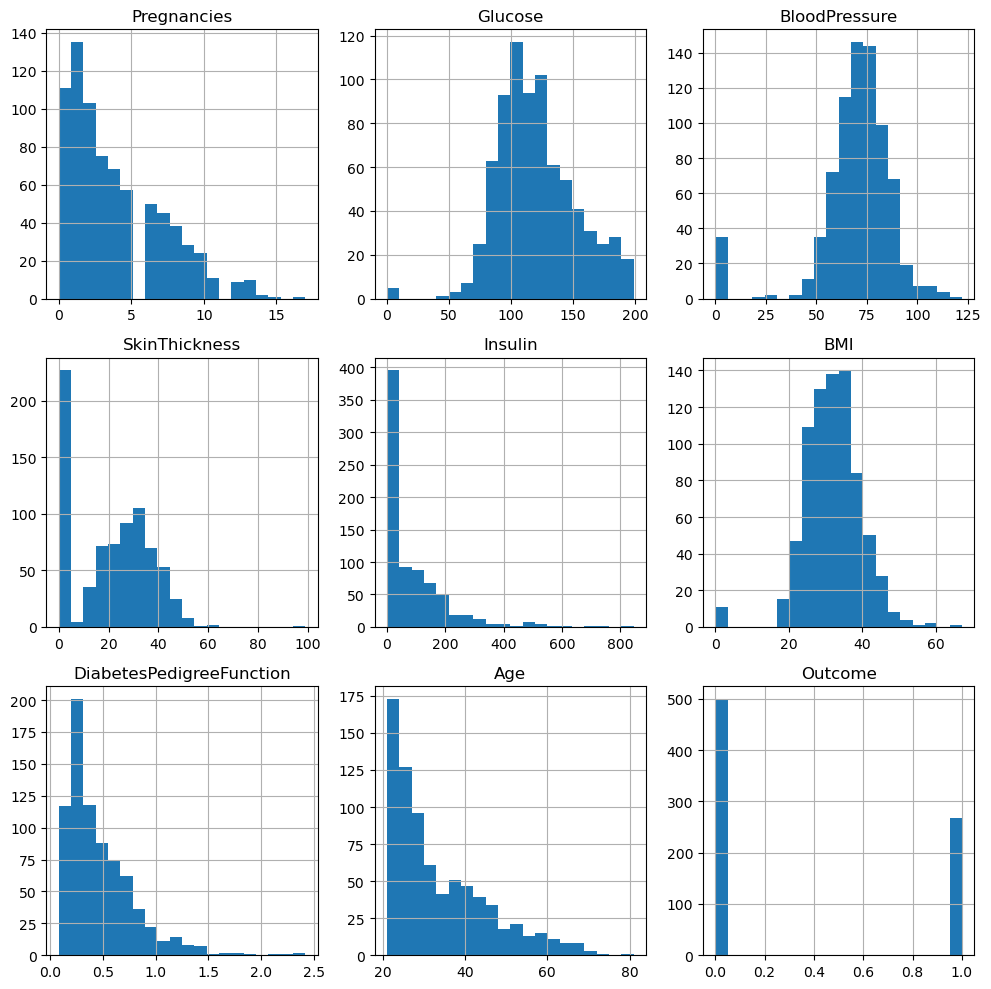

In [11]:
# Histograms of numerical features
data.hist(bins = 20, figsize = (10,10))
plt.tight_layout()
plt.show()
# the last histogram is of the Outcome, which is a categorical variable

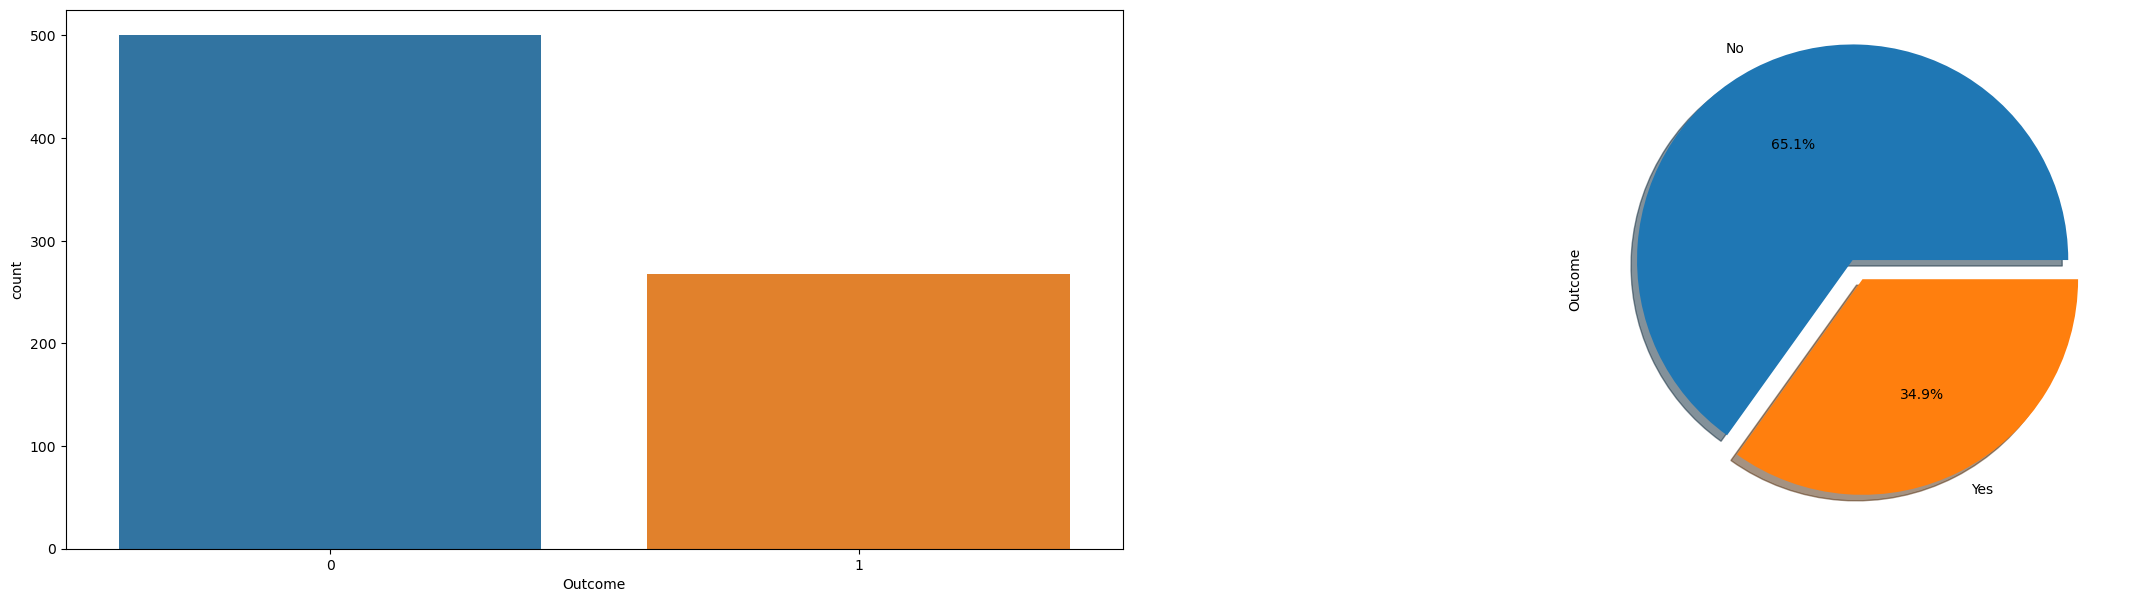

In [12]:
# since the Outcome variable is categorical, pie chart and bar graph is a good way to analyse it
# analysis of ourtcome (target) variable
fig, ax = plt.subplots(1, 2, figsize=(30, 7))
sns.countplot(data=data, x="Outcome", ax=ax[0])
data["Outcome"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])
plt.show()

#### 4.2 Multivariate analysis

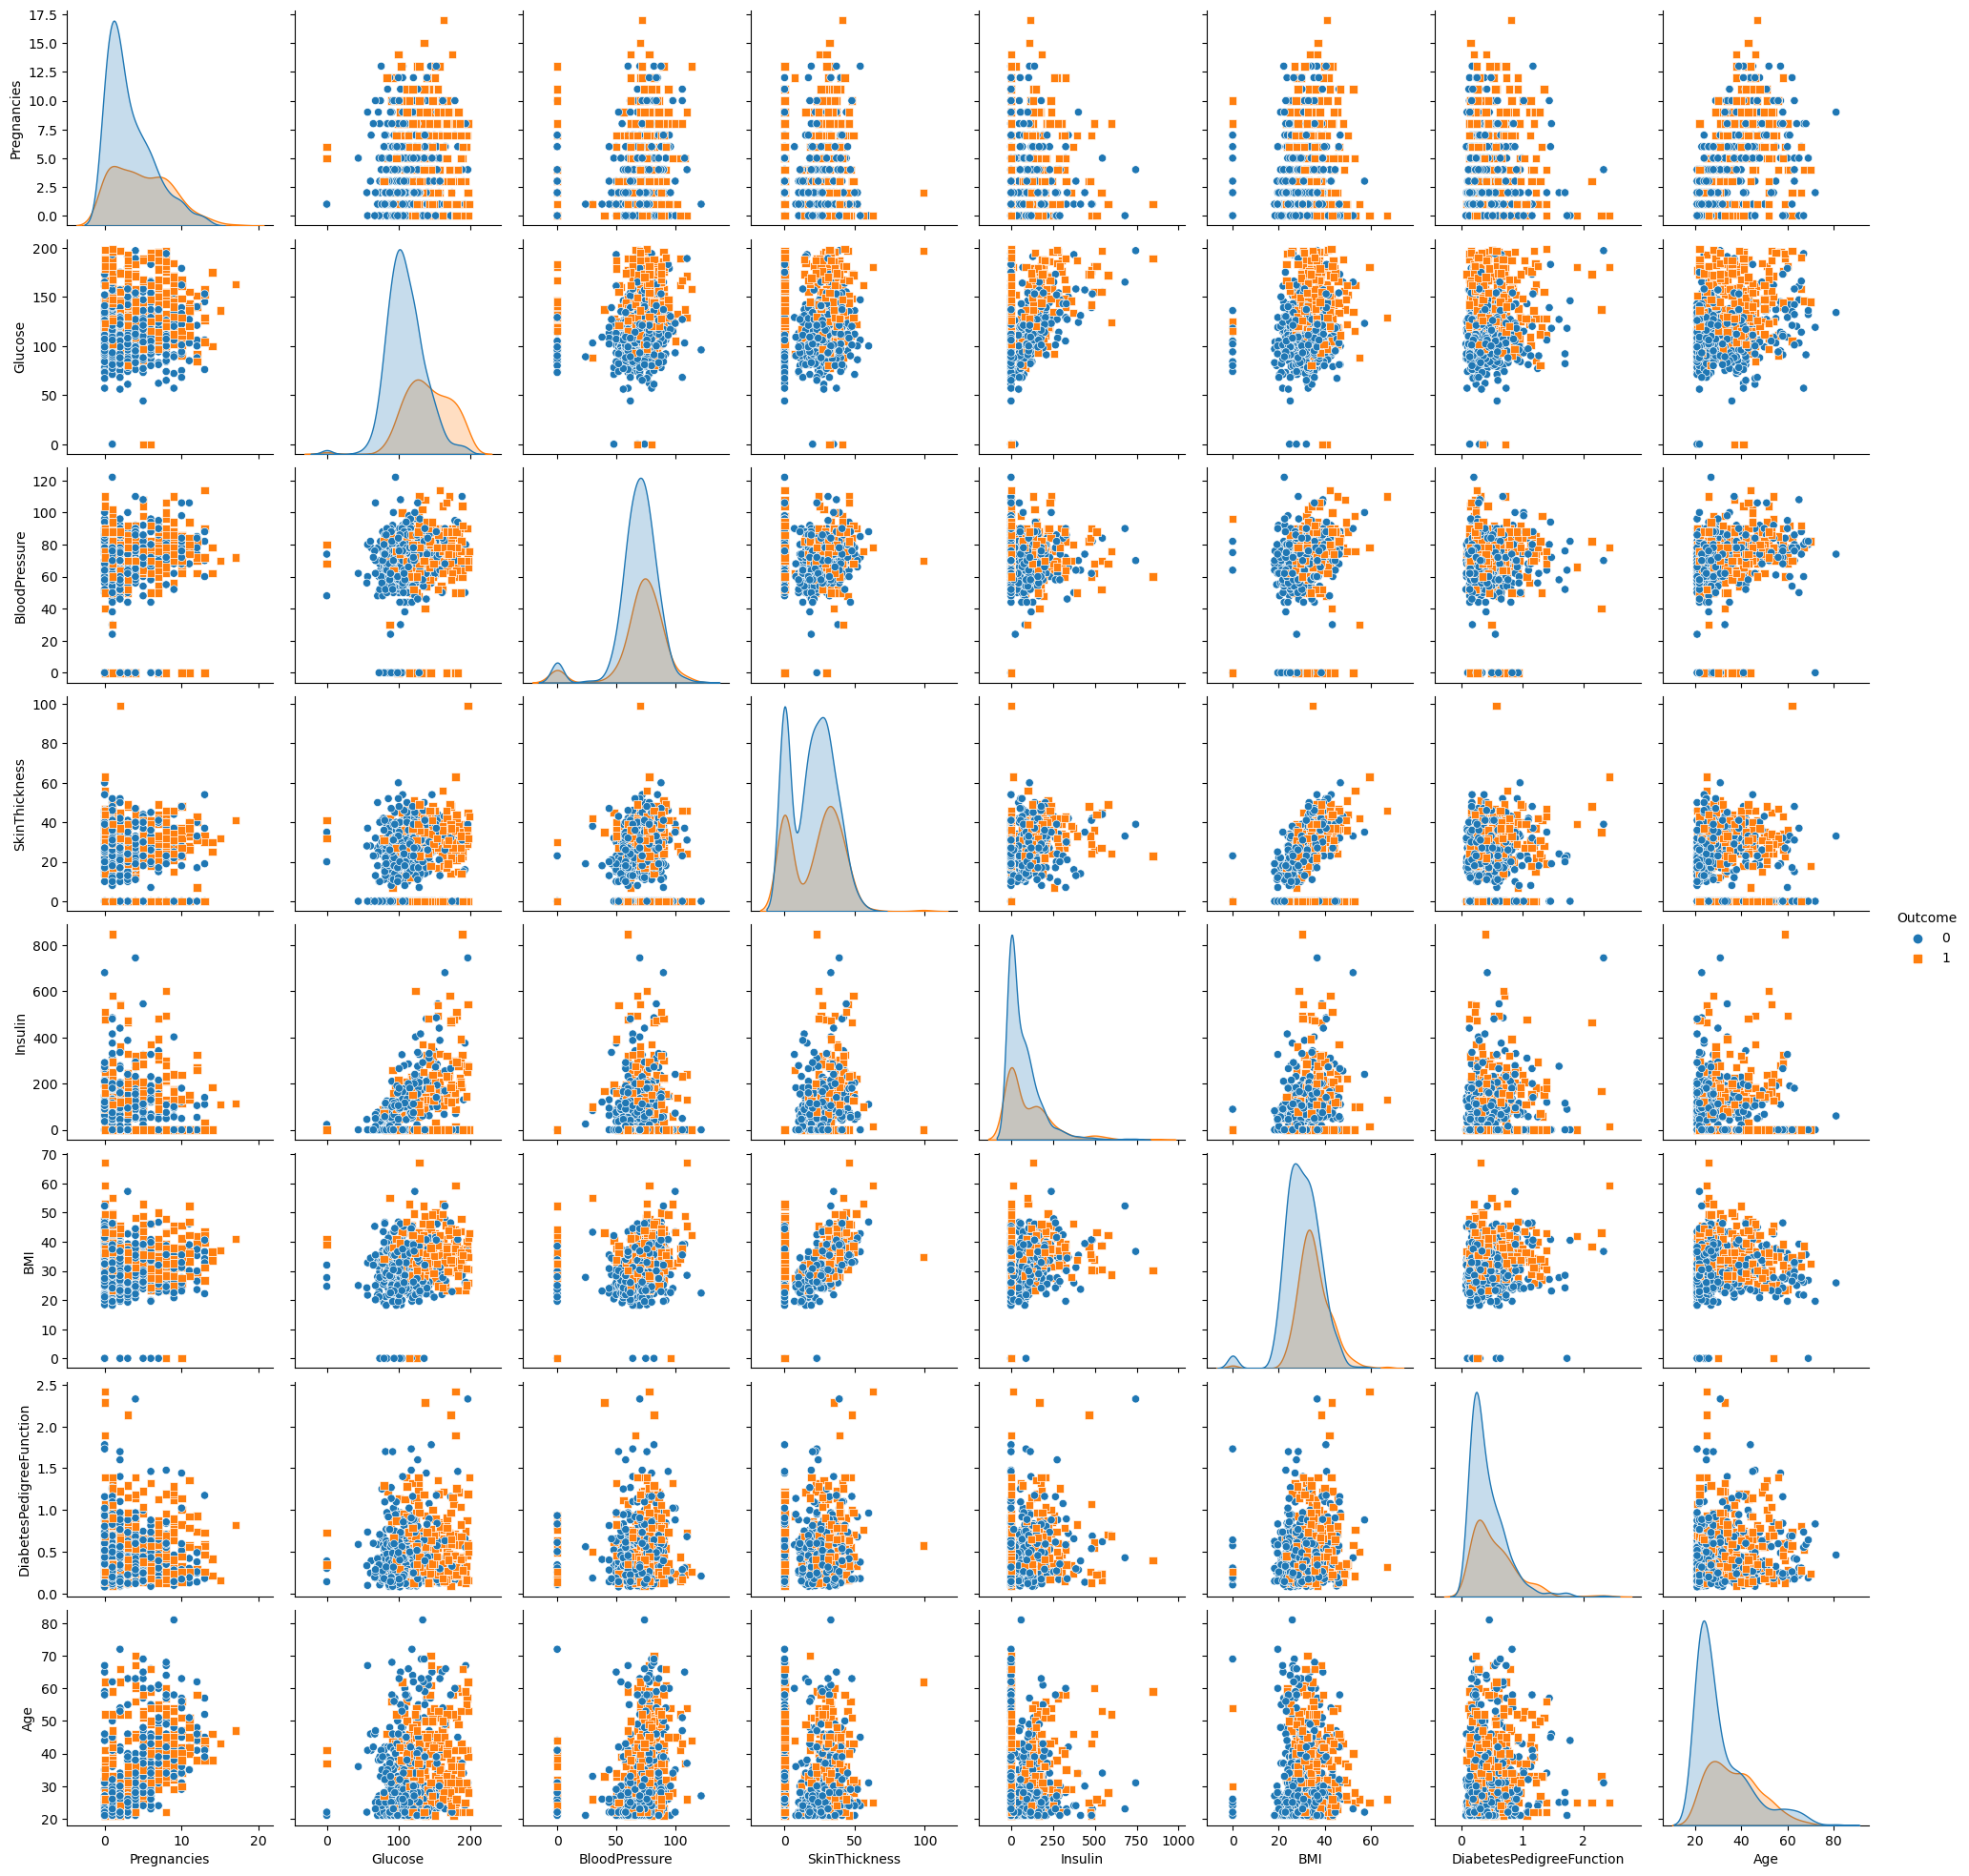

In [13]:
# Plot pairwise relationships in the dataset
sns.pairplot(data, hue='Outcome', diag_kind='kde', markers=["o", "s"])
plt.show()

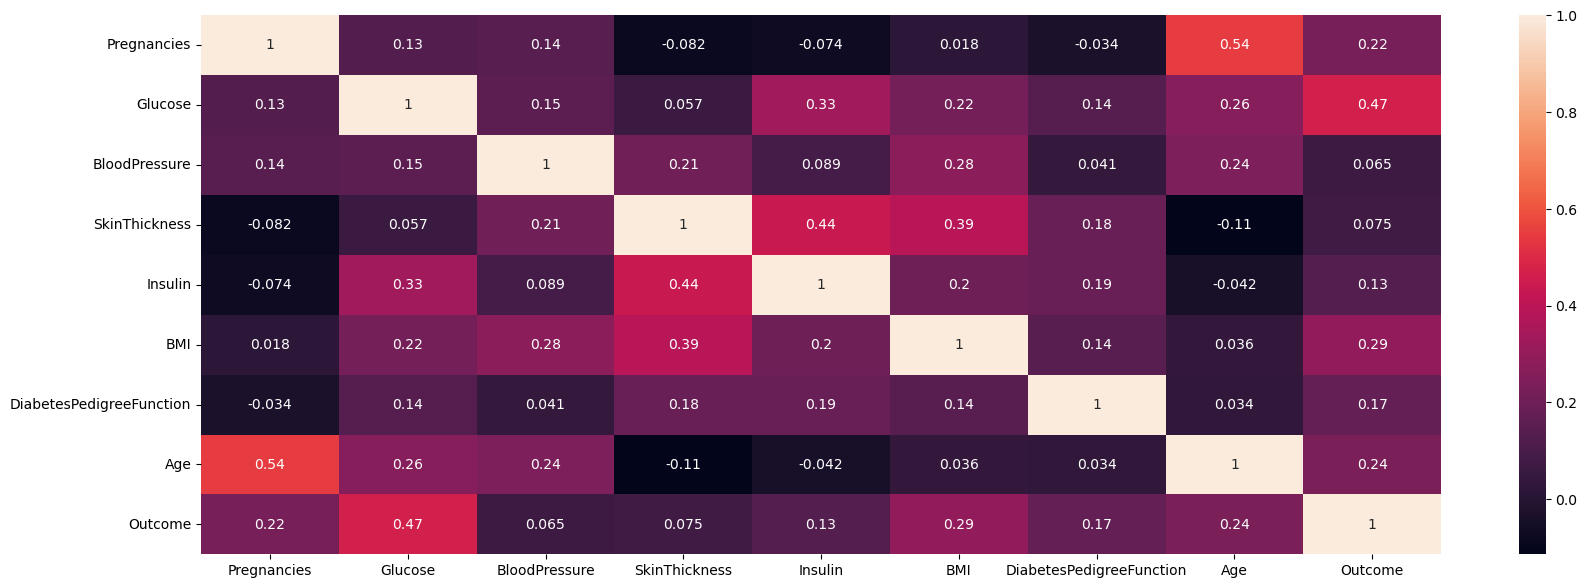

In [14]:
# Heatmap of correlations
# 2D correlation matrix
corr_matrix = data.corr()
# Plotting heatmap of corr
fig20, ax20 = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(data=corr_matrix, annot=True, ax=ax20)
plt.show()

###### The correlation matrix shows how strongly each feature is related to others and the target variable. Features with a high correlation to the target are more likely to be predictive.

### 5. Imputing data

In [15]:
#  data imputation based on the median of a specific variable, grouped by another categorical variable 
# defining function calc_median
# calculates the median of a variable (var) for each group defined by the target variable
def calc_median(data, target, var):
    # Calculate the median for each group in the target variable
    temp = data[data[var].notnull()]  
    # keep rows where the variable is not null
    temp = temp[[var, target]].groupby([target])[[var]].median().reset_index()  
    # calculate medians per target
    return temp

In [16]:
# defining function median_impute
# uses pandas' vectorized .loc operation to assign medians (var_0, var_1) based on the target and var values.
# This approach is faster than looping through rows, 
# as pandas can handle the operation in bulk
def median_impute(data, target, var, var_0, var_1):
    # Use vectorized operations for efficient assignment
    data.loc[(data[target] == 0) & (data[var] == 0), var] = var_0  # Fill missing values for target == 0
    data.loc[(data[target] == 1) & (data[var] == 0), var] = var_1  # Fill missing values for target == 1

In [17]:
insulin = calc_median(data,"Outcome","Insulin")
insulin

,Outcome,Insulin
0,0,39.0
1,1,0.0


In [18]:
median_impute(data,"Outcome","Insulin",insulin.loc[0,"Insulin"],insulin.loc[1,"Insulin"])

In [19]:
glucose = calc_median(data,"Outcome","Glucose")
glucose

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [20]:
median_impute(data,"Outcome","Glucose",glucose.loc[0,"Glucose"],glucose.loc[1,"Glucose"])

In [21]:
skin = calc_median(data,"Outcome","SkinThickness")
skin

,Outcome,SkinThickness
0,0,21.0
1,1,27.0


In [22]:
median_impute(data,"Outcome","SkinThickness",skin.loc[0,"SkinThickness"],skin.loc[1,"SkinThickness"])

In [23]:
bp = calc_median(data,"Outcome","BloodPressure")
bp

,Outcome,BloodPressure
0,0,70.0
1,1,74.0


In [24]:
median_impute(data,"Outcome","BloodPressure",bp.loc[0,"BloodPressure"],bp.loc[1,"BloodPressure"])

In [25]:
bmi = calc_median(data,"Outcome","BMI")
bmi

,Outcome,BMI
0,0,30.05
1,1,34.25


In [26]:
median_impute(data,"Outcome","BMI",bmi.loc[0,"BMI"],bmi.loc[1,"BMI"])

In [27]:
# now, we will check for 0 values again
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.378906,12.104431,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.430990,9.321460,7.000,21.00000,27.0000,32.00000,99.00
Insulin,768.0,91.783854,108.121136,0.000,39.00000,39.0000,127.25000,846.00
BMI,768.0,32.433919,6.880664,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### 6. Perceptron Implementation

In [28]:
features = data.iloc[:, :-1].values # X values, all columns except the last one
labels = data.iloc[:, -1].values    # labels, last column is the target vairable i.e. Outcome

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.4, random_state=1901641, shuffle=True)
# use 40% for training and the rest 60% for testing

# Perceptron class
class Perceptron:
    
    def __init__(self, learning_rate=0.3, n_iter=5000):
        self.learning_rate = learning_rate  # step size during weight update
        self.n_iter = n_iter   # no. of times algorithm iterates over training dataset
        self.weights = None    # store weights assigned to each feature
        self.bias = None       # bias in perceptron

    # Initializes weights and performs dot product with subsets of X
    def fit(self, feature_set, target_set):
        num_samples, num_features = feature_set.shape
        self.weights = np.zeros(num_features)   # initializes weights to 0
        self.bias = 0                           # initializes bias to 0
        
        for _ in range(self.n_iter):
            for i in range(num_samples):
                linear_output = np.dot(feature_set[i], self.weights) + self.bias
                predicted_class = 1 if linear_output >= 0 else 0
                # using a step function as the activation function
                # If the weighted sum of inputs plus the bias is greater than or equal to zero,
                # the output is 1
                # If the weighted sum is less than zero, the output is 0
                updates = self.learning_rate * (target_set[i] - predicted_class)
                # calculate the update value based on the error
                self.weights += updates * feature_set[i]  
                # Update the weights proportionally to the input features
                self.bias += updates
                # update the bias term

    def predict(self, feature_set):
        linear_output = np.dot(feature_set, self.weights) + self.bias
        # compute the linear combination of each sample
        return (linear_output >= 0).astype(int)
        # applies the step activation function to return 1 if the output is non-negative, else 0

# Initialize and train the Perceptron
perceptron_model = Perceptron(learning_rate=0.3, n_iter=5000)
perceptron_model.fit(X_train, y_train)

# Predictions for train and test sets
train_predictions = perceptron_model.predict(X_train)
test_predictions = perceptron_model.predict(X_test)

# Evaluate the accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.720173535791757


#### Observations

1. Learning rate = 0.3, No. of iterations = 5000:- Accuracy = 0.72017
2. Learning rate = 0.1, No. of iterations = 3000:- Accuracy = 0.70716
3. Learning rate = 0.8, No. of iterations = 3000:- Accuracy = 0.70716
4. Learning rate = 0.9, No. of iterations = 3000:- Accuracy = 0.70716
5. Learning rate = 0.1, No. of iterations = 5000:- Accuracy = 0.72017
6. Learning rate = 0.1, No. of iterations = 2000:- Accuracy = 0.70716
7. Learning rate = 0.01, No. of iterations = 2000:- Accuracy = 0.70716
8. Learning rate = 0.01, No. of iterations = 10000:- Accuracy = 0.68112 
9. Learning rate = 0.3, No. of iterations = 10000:- Accuracy = 0.68112
10. Learning rate = 0.01, No. of iterations = 5000:- Accuracy = 0.72017

Hence, it is observed that the highest accuracy is obtained when learning rate is 0.3 and the number of iterations is 5000 or 3000. I got the best results with a learning rate of 0.3

### 7. References

[1]   Siddhardhan 2023, Building Perceptron from scratch in Python | Deep Learning Course, YouTube, 1 July, viewed 26 September 2024, <https://www.youtube.com/watch?v=JlXrqeqyKBo&list=PLfFghEzKVmjsdCvJeiNqL3e3djKmCCuBd&index=6>

[2]   Sparsh Analytics 2021, COMPLETE SOLUTION OF KAGGLE- PIMA INDIAN DIABETES DATASET 92% ACCURACY (1 of 3), YouTube, 29 March, viewed 26 September 2024, <https://www.youtube.com/watch?v=wrKSkt6MAwc>

[3]   Kilic, I 2023, Perceptron Model: The Foundation of Neural Networks, Medium, viewed 26 September 2024, <https://medium.com/@ilyurek/perceptron-model-the-foundation-of-neural-networks-4db25b0148d>
